# Grade Model - Linear Regression

An online education platform, which can track the number of hours its students spend studying a certain track, wants to assess whether this number of hours influences the final test score.

To do this, we will train a linear regression algorithm, so that it is possible to predict the final test score, given the number of hours of study.

## Install Packages

```bash
pipenv install scikit-learn scipy pandas matplotlib statsmodels fastapi uvicorn pydantic pingouin seaborn ipykernel
```

# Run server

```bash
uvicorn grade_model.api_grade_model:app --reload
```

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from scipy.stats import shapiro, kstest, probplot
from statsmodels.graphics.gofplots import qqplot


# Carga dos dados

In [3]:
df_pontuacao = pd.read_csv('./datasets/grades_frequency.csv')

In [4]:
df_pontuacao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   horas_estudo     101 non-null    float64
 1   pontuacao_teste  101 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 1.7 KB


In [5]:
df_pontuacao.head(5)

,horas_estudo,pontuacao_teste
0,1.1,30
1,2.0,55
2,2.5,60
3,3.6,75
4,4.2,85


## EDA

In [6]:
# Medidas estatísticas das variáveis
df_pontuacao.describe()

,horas_estudo,pontuacao_teste
count,101.000000,101.000000
mean,28.604950,455.000000
std,14.116128,221.385411
min,1.100000,30.000000
25%,16.500000,270.000000
50%,30.900000,465.000000
75%,41.800000,655.000000
max,46.900000,800.000000


<Axes: xlabel='horas_estudo', ylabel='pontuacao_teste'>

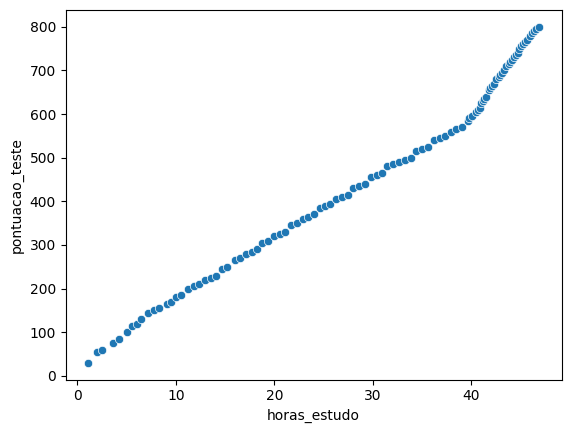

In [7]:
# Plot de dispesão
# X = horas_estudo
# y = pontuacao_teste
sns.scatterplot(data=df_pontuacao, x='horas_estudo', y='pontuacao_teste')

<Axes: ylabel='horas_estudo'>

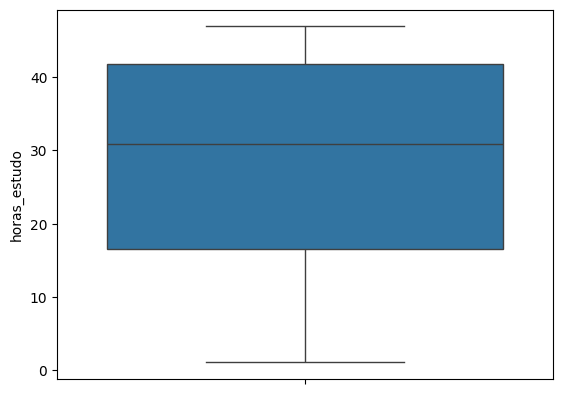

In [9]:
# Verificar se temos outliers
# Plot BoxPlot
sns.boxplot(data=df_pontuacao, y='horas_estudo')

<Axes: ylabel='pontuacao_teste'>

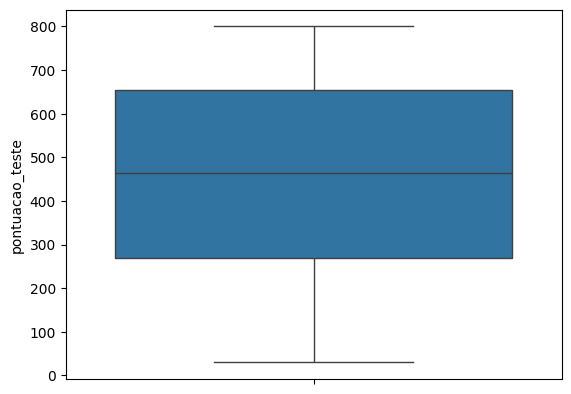

In [10]:
# Verificar se temos outliers
# Plot BoxPlot
sns.boxplot(data=df_pontuacao, y='pontuacao_teste')

<Axes: >

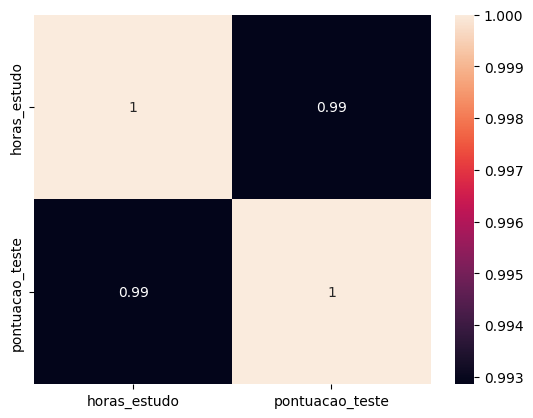

In [11]:
# Verificar Correlação - Pearson
sns.heatmap(df_pontuacao.corr('pearson'), annot=True)

<Axes: >

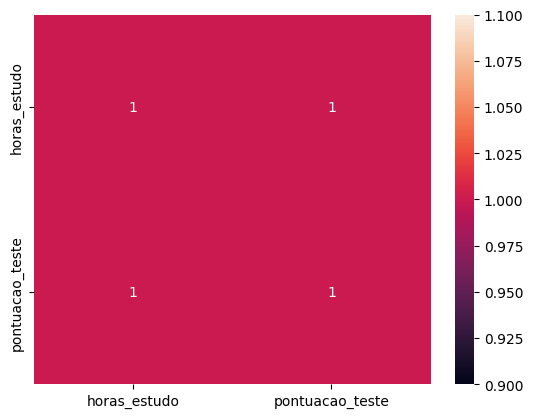

In [12]:
# Verificar Correlação - Spearman
sns.heatmap(df_pontuacao.corr('spearman'), annot=True)

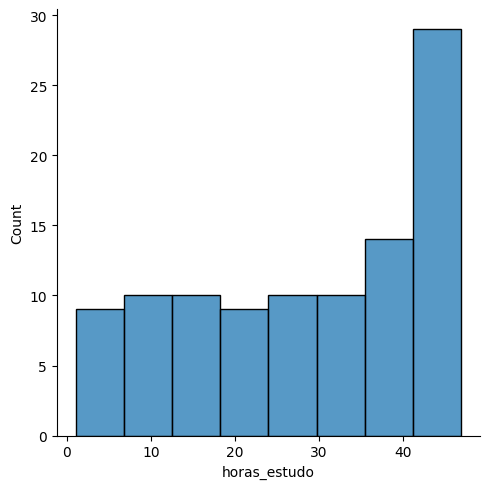

In [14]:
# Histograma das variáveis
sns.displot(df_pontuacao, x='horas_estudo')

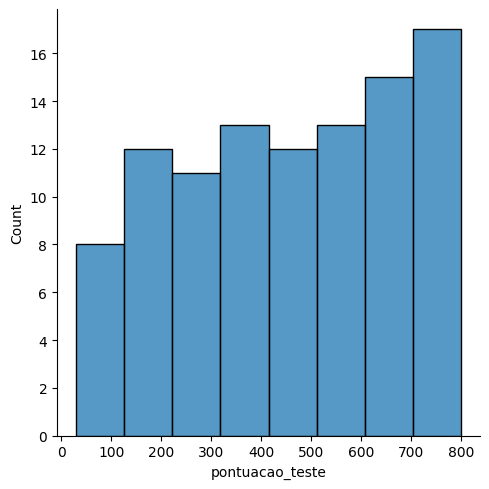

In [15]:
# Histograma das variáveis
sns.displot(df_pontuacao, x='pontuacao_teste')

# Treinar Modelo

In [16]:
# Dividir dataset entre treino e teste
# Quando temos apenas uma feature, precisamos ajustar o shape
X = df_pontuacao['horas_estudo'].values.reshape(-1, 1)
y = df_pontuacao['pontuacao_teste'].values.reshape(-1, 1)
X, y

(array([[ 1.1],
        [ 2. ],
        [ 2.5],
        [ 3.6],
        [ 4.2],
        [ 5. ],
        [ 5.5],
        [ 6.1],
        [ 6.5],
        [ 7.2],
        [ 7.8],
        [ 8.3],
        [ 9.1],
        [ 9.5],
        [10. ],
        [10.5],
        [11.2],
        [11.8],
        [12.4],
        [13. ],
        [13.6],
        [14.1],
        [14.7],
        [15.2],
        [16. ],
        [16.5],
        [17.1],
        [17.7],
        [18.2],
        [18.8],
        [19.4],
        [20. ],
        [20.6],
        [21.1],
        [21.7],
        [22.3],
        [22.9],
        [23.4],
        [24. ],
        [24.6],
        [25.2],
        [25.7],
        [26.3],
        [26.9],
        [27.5],
        [28. ],
        [28.6],
        [29.2],
        [29.8],
        [30.4],
        [30.9],
        [31.5],
        [32.1],
        [32.7],
        [33.3],
        [33.9],
        [34.4],
        [35. ],
        [35.6],
        [36.2],
        [36.8],
        [37.3],
        

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)

In [18]:
# Instanciar o modelo a ser treinado
reg_model = LinearRegression()

In [19]:
# Treinar o modelo
reg_model.fit(X_train, y_train)

LinearRegression()

In [20]:
# Imprimir a equação da reta
# y = aX + b
print("A equação da reta é y = {:4f}x + {:4f}".format(reg_model.coef_[0][0], reg_model.intercept_[0]))

A equação da reta é y = 15.642619x + 8.476601


# Validar Modelo - Métricas

In [21]:
# Predição dos valores com base no conjunto de testes
y_pred = reg_model.predict(X_test)

In [22]:
# Calcular métrica R-squared ou Coeficiente de Determinação
# R2 representa a proporção na variação na variável dependente que é explicada pela variável independente
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
r2_score(y_test, y_pred)

0.9828400452912442

In [23]:
# Calcular métrica MAE (Mean Absolute Error)
# MAE = media (y_test - y_pred)
# É uma métrica facil de interpretar pois é a média dos erros na unidade da variável dependente
# MAE é menos sensível a outliers
mean_absolute_error(y_test, y_pred)

22.957470277134636

In [24]:
# Calcular métrica MSE (Mean Squared Error)
# MSE = Média (y_test - y_pred)²
# Não é uma métrica fácil de interpretar pois não está na unidade da variável dependente
# MSE é mais sensível a outliers
mean_squared_error(y_test, y_pred)

766.9972992416428

In [25]:
# Calcular métrica RMSE (Root Mean Squared Error)
# RMSE = Raiz (Média (y_test - y_pred)²)
# É uma métrica fácil de interpretar
# MSE é mais sensível a outliers e penaliza grandes erros
mean_squared_error(y_test, y_pred, squared=False)

27.694716088843425

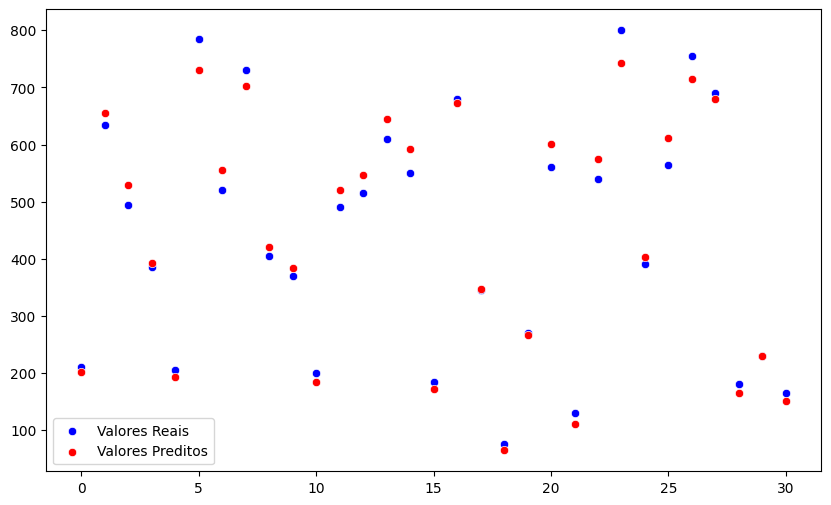

In [27]:
# Analise Gráfica
x_axis = range(len(y_test))
plt.figure(figsize=(10,6))
sns.scatterplot(x=x_axis, y=y_test.reshape(-1), color='blue', label='Valores Reais')
sns.scatterplot(x=x_axis, y=y_pred.reshape(-1), color='red', label='Valores Preditos')
plt.legend()
plt.show()

# Análise de Resíduos

In [28]:
# Calcular resíduos
residuos = y_test - y_pred

In [29]:
# Calcular os resíduos padronizados (standardized residuals)
# Para cada elemento de um conjunto (X - media(X)) / desvio_padrao(X)
from scipy.stats import zscore
residuos_padronizados = zscore(residuos)

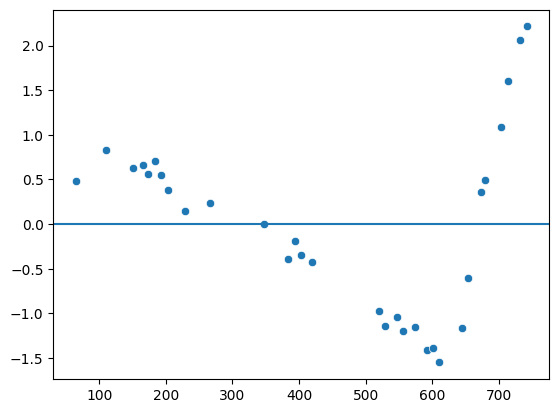

In [31]:
# Verificar linearidade do modelo
# Se os resíduos estiverem entre -2 e 2 (na escala padrão), o modelo é linear

# Verificar homogeneidade das variâncias (Homocedasticidade)
# Valores estiverem em torno da reta, temos homocedasticidade, 
# caso contrário se tivermos alguma tendencia ou padrão (formam um cone, funil)
# temos heterocedasticidade
sns.scatterplot(x=y_pred.reshape(-1), y=residuos_padronizados.reshape(-1))
plt.axhline(y=0)

Este modelo parece mais com heterocedasticidade

Text(0, 0.5, 'Resíduos Padronizados')

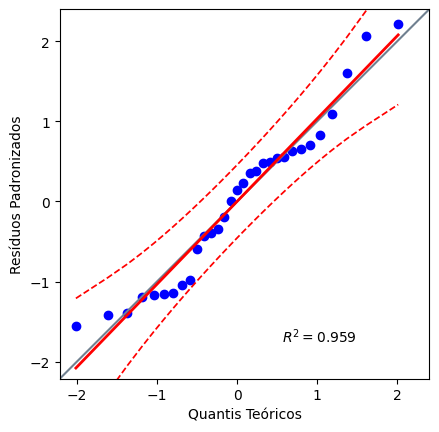

In [32]:
# Checar se residuos seguem uma distribuição normal
# QQ (Quantile-Quantile) Plot, que avalia se uma amostra 
# segue uma distribuição normal
import pingouin as pg
pg.qqplot(residuos_padronizados, dist='norm', confidence=0.95)
plt.xlabel('Quantis Teóricos')
plt.ylabel('Resíduos Padronizados')

In [34]:
# Teste de Normalidade - Shapiro-Wilk
# H0: Os dados seguem uma distribuição normal
# H1: Os dados não seguem uma distribuição normal
# Se o p-valor>0.05, falhamos em rejeitar H0, ou seja, os dados seguem uma distribuição normal
# Caso contrário (p-valor<=0.05), rejeitamos H0, ou seja, os dados não seguem uma distribuição normal
stat_shapiro, p_valor_shapiro = shapiro(residuos_padronizados)
print("Estatistica do teste: {} e P-Valor: {}".format(stat_shapiro,p_valor_shapiro))

Estatistica do teste: 0.9500531554222107 e P-Valor: 0.15663768351078033


Segundo Shapiro-Wilk segue a distribuição normal

In [35]:
# Teste de Normalidade - Kolmogorov-Smirnov
# H0: Os dados seguem uma distribuição normal
# H1: Os dados não seguem uma distribuição normal
# Se o p-valor>0.05, falhamos em rejeitar H0, ou seja, os dados seguem uma distribuição normal
# Caso contrário (p-valor<=0.05), rejeitamos H0, ou seja, os dados não seguem uma distribuição normal
stat_ks, p_valor_ks = kstest(residuos.reshape(-1), 'norm')
print("Estatistica do teste: {} e P-Valor: {}".format(stat_ks,p_valor_ks))

Estatistica do teste: 0.4835580845051284 e P-Valor: 3.3953689958140517e-07


Segundo Kolmogorov-Smirnov não segue a distribuição normal

## Fazer predições com o modelo

In [36]:
# Se eu estudar 30.4 horas, qual a pontuação prevista pelo modelo?
reg_model.predict([[30.4]])

array([[484.01220436]])

In [37]:
# Quantas horas estudar para obter 600 pontos (pelo modelo)?
# y = aX + b
# y - b = aX
# (y - b) / a = X
# x = (y-b)/a
(600 - reg_model.intercept_[0]) / reg_model.coef_[0][0]

37.81485802710669

## Salvar modelo para usar depois

In [38]:
import joblib
joblib.dump(reg_model, 'grade_model.pkl')

['modelo_regressao_grades.pkl']